# Broadband Growth Across the US
## Inferential Stats
### Chester Hitz | Springboard Data Science Career Track | Capstone I

The goal of this section of my capstone project is to test the hypothesis I developed from my data in the Data Storytelling submission. Namely, that economic factors are the most closely correlated with my target variable, Broadband Subscription Category (BSC). I showed in that section that BSC moved upwards over the four years of my study period, as well as that economic factors seem to be correlated with BSC. In this section, I will examine several of the different economic factors that I collected and highlight several which will be useful in building my predicitive model in the subsequent machine learning module.

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

# import relevant data
broadband = pd.read_csv('broadband.csv', dtype={'county_fips':str})

-----------------------------------------------------
## Factors
### Individual Correlation

To start, I want to examine the features I have collected to see which are the most predictive of BSC. I begin this by running the correlation function on the dataframe and isolating the correlations to the BSC. I then select the top five (positive and negative) and run a function which visualizes the distribution for each year.  

In [2]:
broadband['EmploymentRate'] = broadband['EmploymentRate'] / broadband['Population']

rank_df = broadband.corr()['BSC']
rank_df = rank_df.sort_values(ascending=False)
rank_df

BSC                1.000000
PctBachelors       0.602898
Income             0.549882
HomePrice          0.488277
EmploymentRate     0.451155
InformationJobs    0.317153
Families           0.262034
Population         0.245332
colleges           0.231699
Year               0.230893
Unnamed: 0         0.228603
PublicTrans        0.189963
PopDensity         0.127321
state              0.017307
TractArea         -0.011509
AgJobs            -0.166706
Rural_Pct         -0.420973
Name: BSC, dtype: float64

The top five correlated features: 

*  Percent of population with Bachelor's degrees (PctBachelors)
*  Income (Income)
*  Median price of a home (HomePrice)
*  Employment Rate (EmploymentRate)
*  Percent rural population (Rural_Pct)

In [3]:
def boxplotter(df, factor, target):
    seg = df[[target, factor]]
    sns.set(style="ticks")
    plt.subplots(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    sns.distplot(df[factor].dropna())
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=target, y=factor, data=seg, palette="PRGn")
    sns.regplot(x=seg[target], y=seg[factor], fit_reg=1, scatter = 0, color='red')
    
    plt.show()
    
    seg = seg.dropna()
    lr_results = stat.linregress(seg[target], seg[factor])
    print('r-value:', lr_results.rvalue)
    print('intercept:', lr_results.intercept)
    print('slope:', lr_results.slope)
    print('pvalue:',lr_results.pvalue)
    print('std error:',lr_results.stderr)

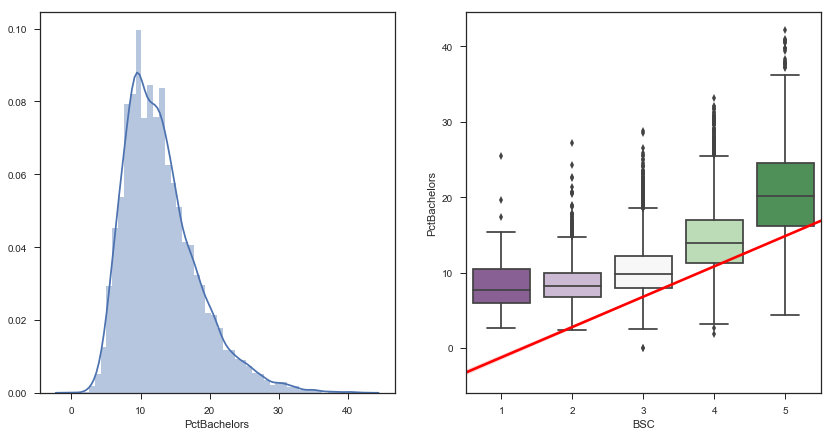

r-value: 0.602898381941
intercept: -1.25070575502
slope: 4.02329243362
pvalue: 0.0
std error: 0.0425012943124


In [4]:
boxplotter(broadband,'PctBachelors','BSC')

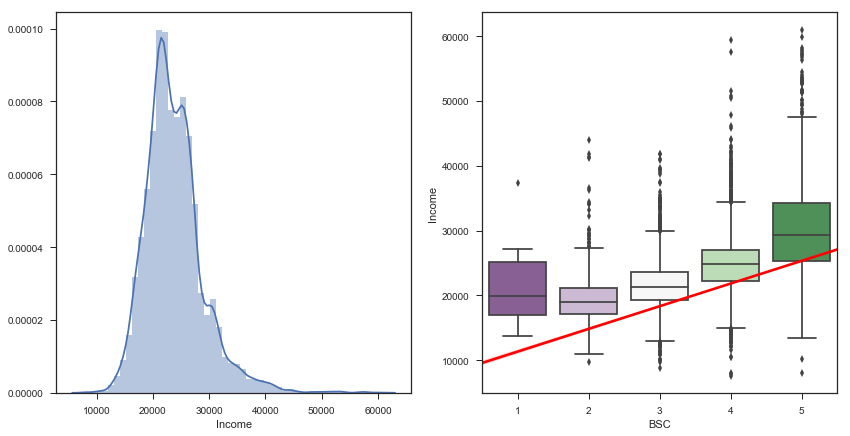

r-value: 0.54988165372
intercept: 11350.7776651
slope: 3499.23138707
pvalue: 0.0
std error: 43.6108295101


In [5]:
boxplotter(broadband,'Income','BSC')

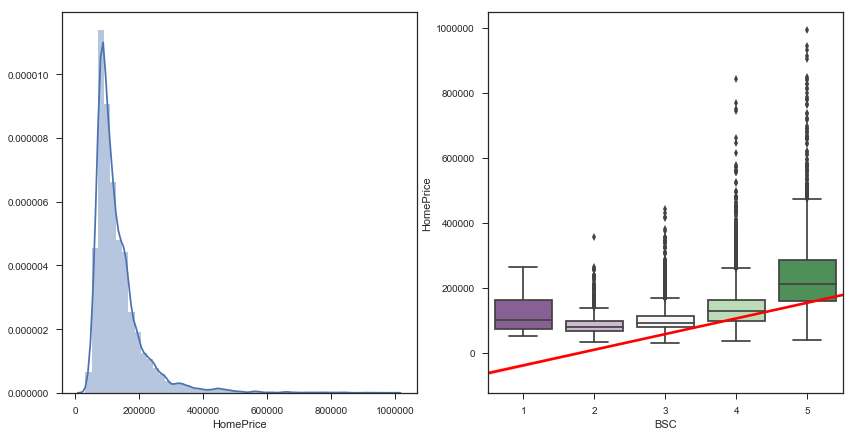

r-value: 0.488277458162
intercept: -38568.2920201
slope: 48150.0426553
pvalue: 0.0
std error: 686.989465546


In [6]:
boxplotter(broadband,'HomePrice','BSC')

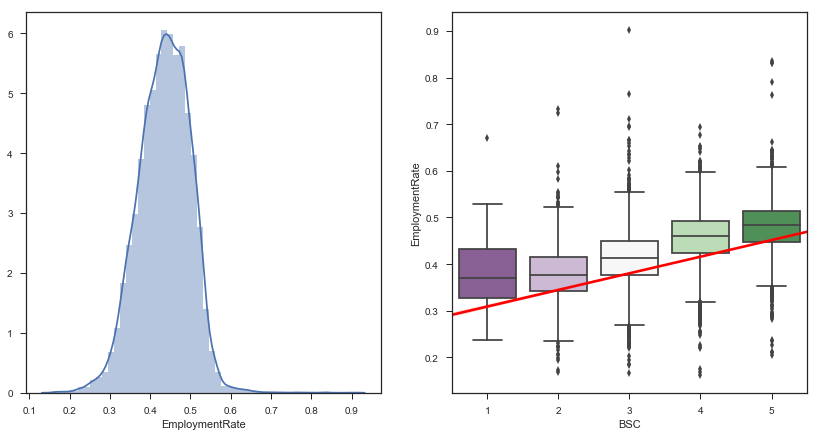

r-value: 0.451154696854
intercept: 0.308993143194
slope: 0.0356171865478
pvalue: 0.0
std error: 0.000562440790641


In [7]:
boxplotter(broadband,'EmploymentRate','BSC')

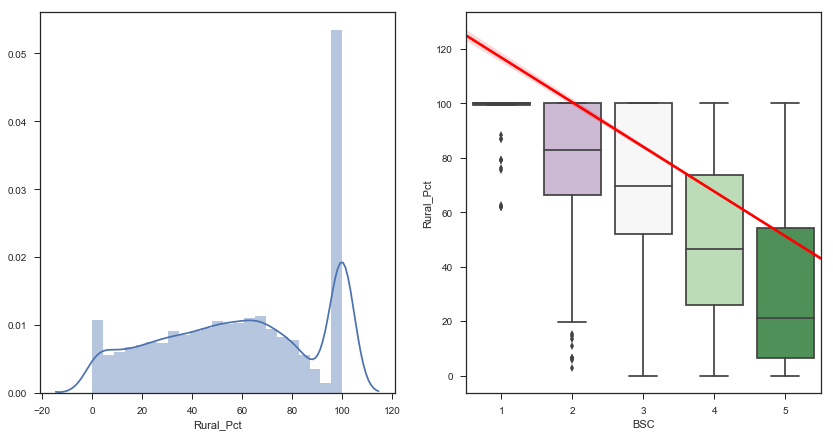

r-value: -0.420972764966
intercept: 116.818648604
slope: -16.4009487794
pvalue: 0.0
std error: 0.282109814639


In [8]:
boxplotter(broadband,'Rural_Pct','BSC')

The distributions appear fairly normal both as a whole and when segmented into BSCs, with the exception of Percentage of Rural Population. This is expected as populations tend to be concentrated in metro areas, with lots of counties being rural.

With a few exceptions, one higher BSC category is associated with a higher median for that feature, which is what we would expect from our correlation analysis.

### Paired Correlation

Since all these features are economic, they are likely closely correlated with each other. It is good to examine this as more differentiated features will result in minimized colinearity and a stronger model. Creating a correlation matrix is a good way of displaying this, and a visualization heatmap complements it well.



                Rural_Pct    Income  HomePrice  PctBachelors  EmploymentRate
Rural_Pct        1.000000 -0.352572  -0.413839     -0.447547       -0.210133
Income          -0.352572  1.000000   0.644425      0.685178        0.678262
HomePrice       -0.413839  0.644425   1.000000      0.665955        0.378627
PctBachelors    -0.447547  0.685178   0.665955      1.000000        0.631745
EmploymentRate  -0.210133  0.678262   0.378627      0.631745        1.000000


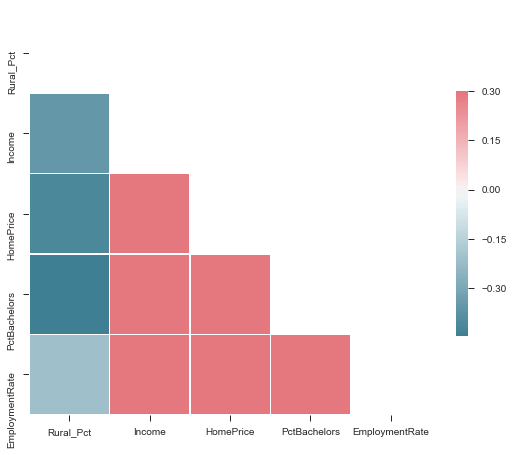

In [21]:
corr_df = broadband[['Rural_Pct', 'Income', 'HomePrice', 'PctBachelors','EmploymentRate']]
corr_results = corr_df.corr()

mask = np.zeros_like(corr_results, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_results, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})

print(corr_results)
plt.show()

The figures below display: 
*  The .68 correlation between the top two most correlated to BSC features, Median Income and Percent of the Population with a Bachelor's Degree.
*  The maximum found correlation (-.77) between Employment Rate and Rural Percentage.
*  The minimum found correlation (.35) between Income and Rural Percentage.

BSC expressed through hue in each figure, and confirms that BSC values are correlated with an increase in economic indicators.

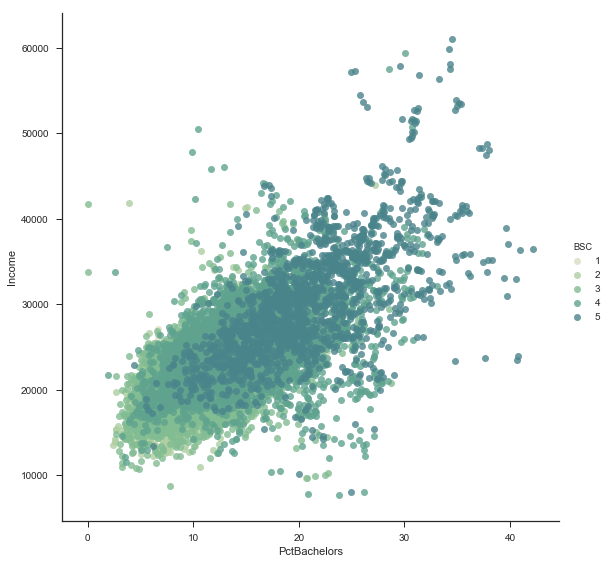

In [11]:
sns.set_palette(sns.cubehelix_palette(8, start=.5, rot=-.75))
g = sns.lmplot(x="PctBachelors", y="Income", hue="BSC",
               truncate=True, size=8, data=broadband, fit_reg=0)

# Use more informative axis labels than are provided by default
g.set_axis_labels("PctBachelors", "Income")
plt.show()

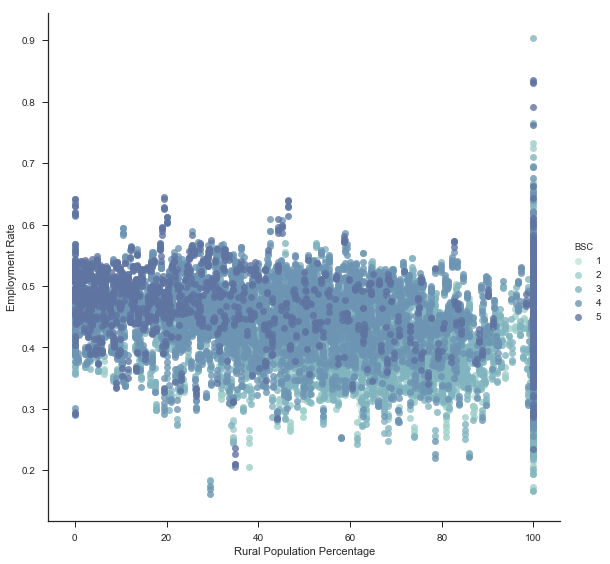

In [13]:
sns.set_palette(sns.cubehelix_palette(8, start=.5, rot=-.5))
g = sns.lmplot(y="EmploymentRate", x="Rural_Pct", hue="BSC",
               truncate=True, size=8, data=broadband, fit_reg=0)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Rural Population Percentage", "Employment Rate")
plt.show()

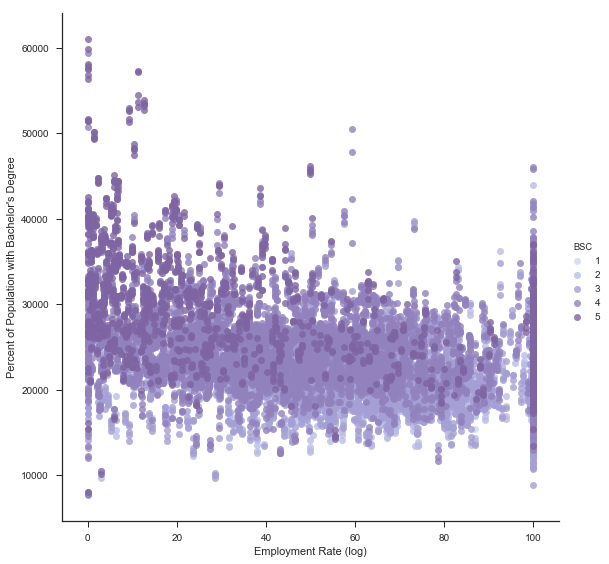

In [14]:
sns.set_palette(sns.cubehelix_palette(8, start=.5, rot=-.25))
g = sns.lmplot(x="Rural_Pct", y="Income", hue="BSC",
               truncate=True, size=8, data=broadband, fit_reg=0)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Employment Rate (log)", "Percent of Population with Bachelor's Degree")
plt.show()

In these figures, the correlation between income and percentage of the population with Bacehlor's degrees is readily apparent. The hue of the points indicates the BSC and we can visually see it being correlated with higher values.

## Conclusions

This small step in my project has been an important link between my initial data collection and my Machine Learning.  In that next step, I plan to take the features identified here as being important to determination and fit them to a Multiple Linear Regression model. There will be some challenges in determining hyperparameters and feature selection, but the discoveries in this unit will help with that.